In [1]:
import random
import json
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import run_analysis
import utils

rms_deviation: 1.4863038150853296
std_difference: 1.4653340900806786


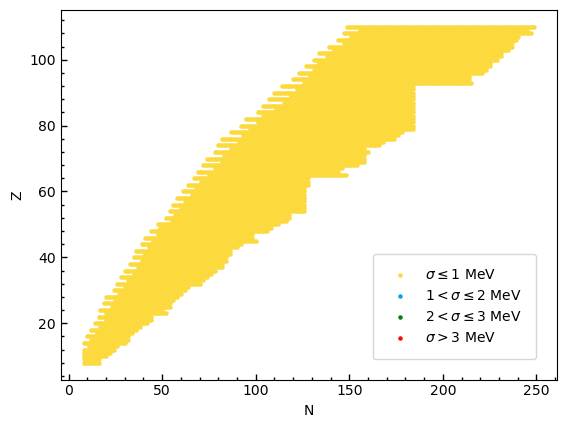

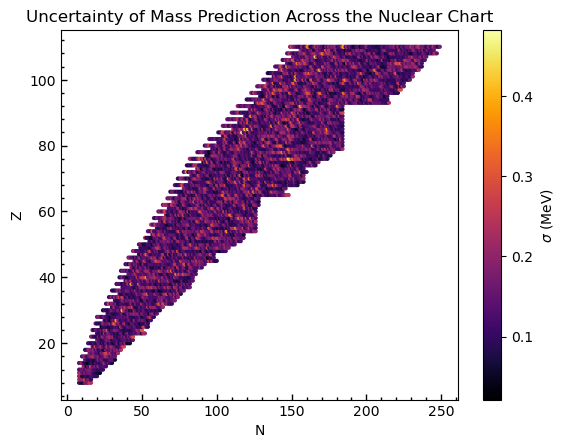

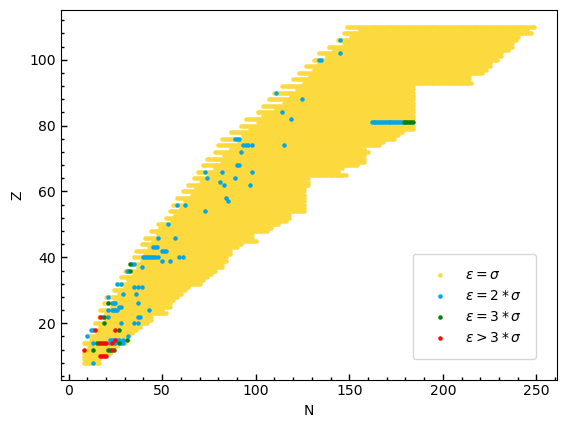

In [2]:
result = ["EXT on diff, code:5415"]
dir = "data/output/"

run_analysis.main(dir + result[0] + ".dat")

In [3]:
file = dir + result[0] + ".dat"
ds = pd.read_csv(file, sep=";")
db = pd.read_csv("data/input/bsk24_mass_table.csv", sep=";")

m_bsk24: 0   -2.75
Name: m, dtype: float64


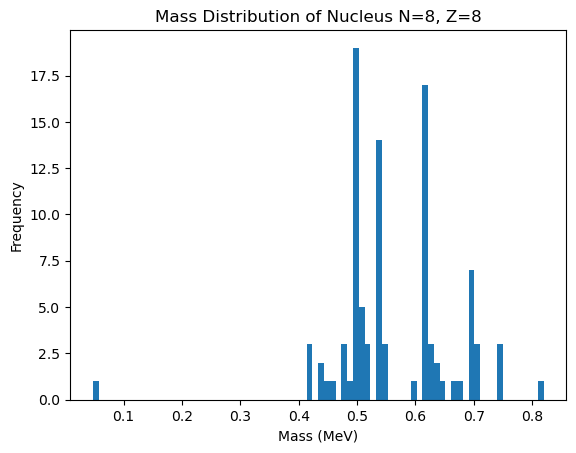

In [9]:
ni = 8
zi = 8
mbsk = db[(db["N"] == ni) & (db["Z"] == zi)]["m"]
print(f"m_bsk24: {mbsk}")
run_analysis.plot_histogram_nucleus(ni, zi, ds)

rms_deviation: 1.3557630449783515
std_difference: 1.3479166043530455


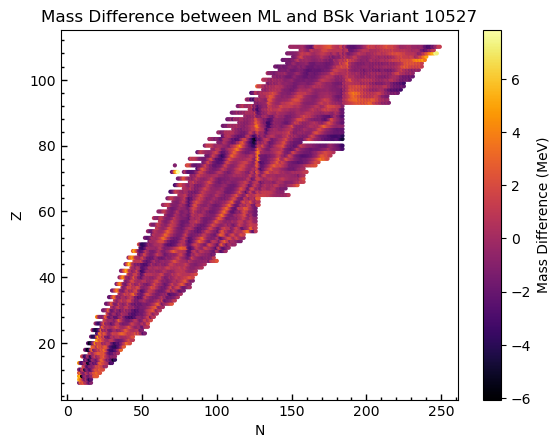

rms_deviation: 1.3736750190887113
std_difference: 1.3701466169479668


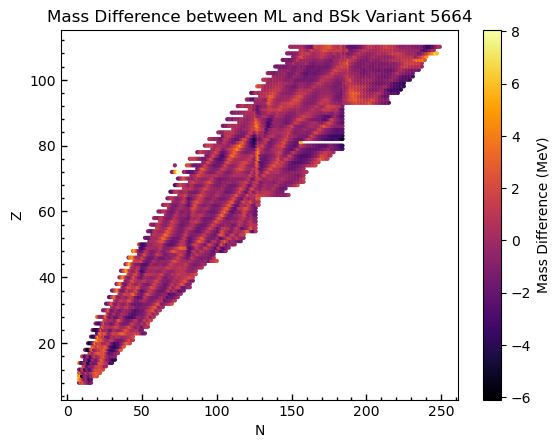

rms_deviation: 1.413457622397671
std_difference: 1.4135657852987826


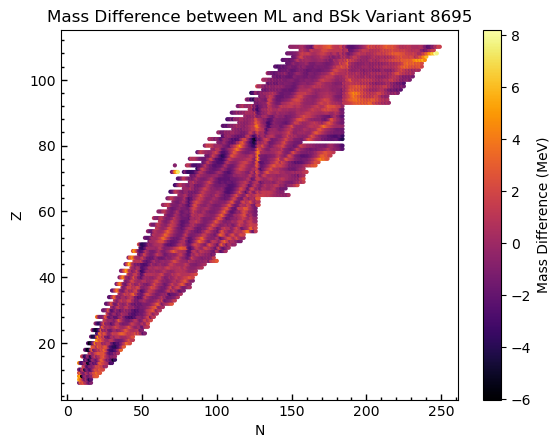

rms_deviation: 1.479685952258446
std_difference: 1.4630012181864345


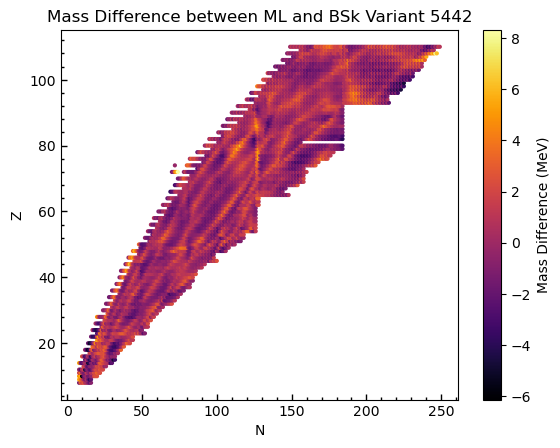

rms_deviation: 1.8103030991383213
std_difference: 1.6872299500606618


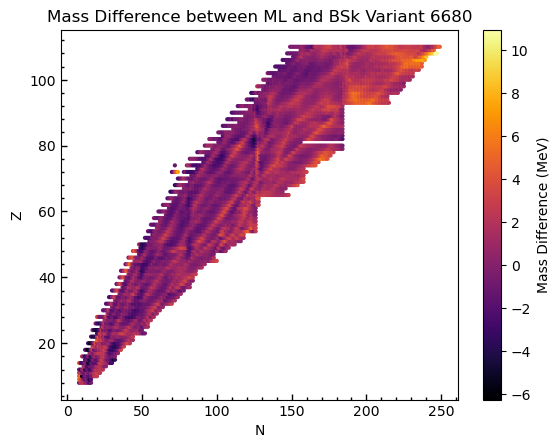

In [ ]:
# Analyse the deviation of one variant
import glob

file_pattern = "data/output/Variant_Diff*"

result_one = glob.glob(file_pattern)

for aa in range(len(result_one)):
    analysed = aa
    analysed_variant = result_one[analysed][20:-4]
    dat = pd.read_csv(result_one[analysed], sep=";")
    dat = dat[((dat["Z"] != 81)) | ((dat["Z"] == 81) & (dat["N"] < 157))]
    # dat["sign"] = dat["Difference"].apply(lambda x: -1 if x < 0 else 1)

    rms_dev = np.sqrt((dat["Difference"] ** 2).mean())
    std_diff = dat["Difference"].std()

    fig, ax = plt.subplots()
    scatter = ax.scatter(dat["N"], dat["Z"], c=dat["Difference"], s=4, cmap="inferno")
    colourbar = fig.colorbar(scatter, ax=ax)
    colourbar.set_label("Mass Difference (MeV)")
    ax.set_title(f"Mass Difference between ML and BSk Variant {analysed_variant}")

    ax.set_xlabel("N")
    ax.set_ylabel("Z")
    utils.plot.set_tick(ax)

    print(f"rms_deviation: {rms_dev}")
    print(f"std_difference: {std_diff}")
    fig.savefig(f"variant_{analysed_variant}")
    plt.show()

rms_deviation: 6.6511093794113725
std_difference: 5.90184798681107
             Difference     BSk24
Z     N                          
8.0   8.0     -0.383780  0.034929
      9.0      3.173398  0.036989
      10.0     3.022354  0.048300
      11.0     6.593480  0.068892
      12.0     5.805333  0.059346
...                 ...       ...
110.0 245.0  -10.060003  2.807452
      246.0   -8.928142  2.858407
      247.0   -7.568252  2.864776
      248.0   -6.045213  2.921869
      249.0   -3.285790  2.926984

[6425 rows x 2 columns]


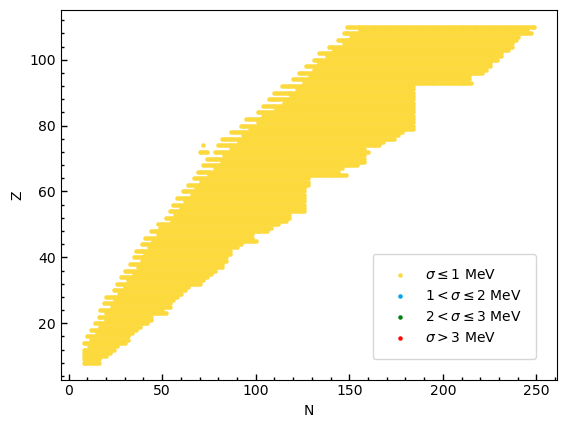

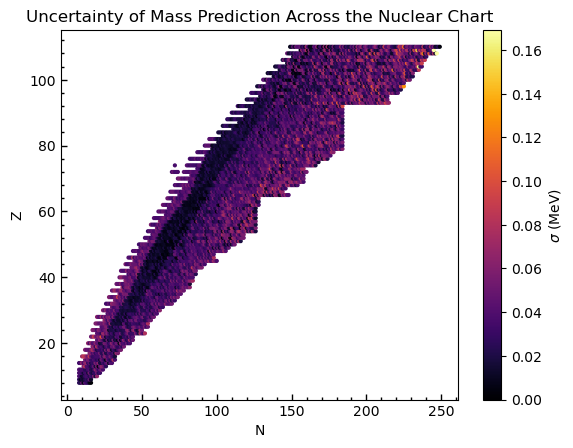

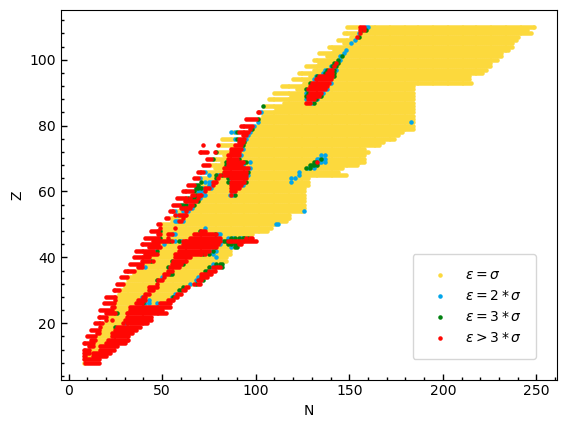

In [54]:
ff = "data/output/EXT 24 run custom loss, code: 369.dat"
ssd = pd.read_csv(ff, sep=";")
run_analysis.main(ff)

In [8]:
ni = 126
zi = 100
mbsk = db[(db["N"] == ni) & (db["Z"] == zi)]["m"]
print(f"m_bsk24: {mbsk.iloc[0]}")

run_analysis.plot_histogram_nucleus(ni, zi, ssd, resolution=0.01)

m_bsk24: 83.2


NameError: name 'ssd' is not defined

In [12]:
np.sqrt((ds["Difference"] ** 2).mean())

1.4863038150853296

In [15]:
(ds["Difference"]).mean()

-0.24879413103675393